### EDA on Rental Listings

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from utils.db_engine import DBEngine
db = DBEngine()
engine = db.get_engine()

2025-04-14 04:40:49,366 - INFO - Database engine created successfully.


In [4]:
rentals = pd.read_sql("SELECT * FROM rental_listings", engine)

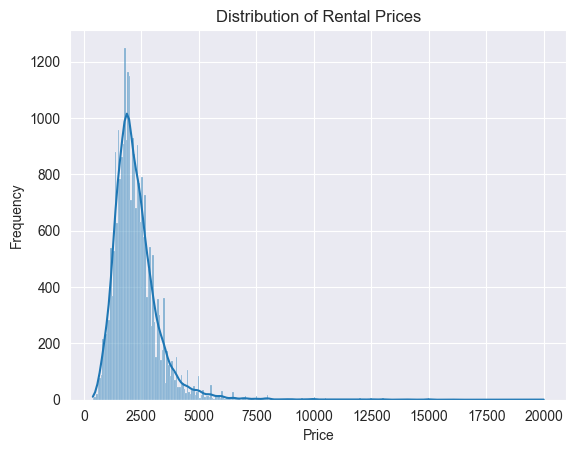

In [8]:
sns.histplot(rentals["price"], kde=True)
plt.title("Distribution of Rental Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

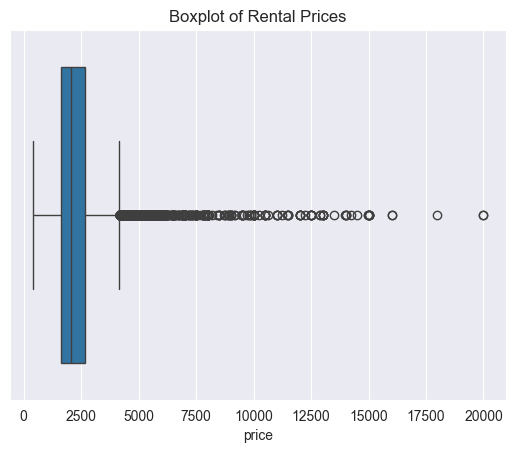

In [9]:
sns.boxplot(x=rentals["price"])
plt.title("Boxplot of Rental Prices")
plt.show()

### Since Prices are significantly right-skewed, we will first apply Log Transformation

In [12]:
# check zero or negative
rentals.query("price <= 0")

,listing_db_id,listing_id,listing_name,formatted_address,address_line_1,address_line_2,city,state,zip_code,county,...,square_footage,year_built,price,status,listing_type,listed_date,last_seen_date,removed_date,created_date,days_on_market


In [13]:
rentals["price_log"] = np.log(rentals["price"])

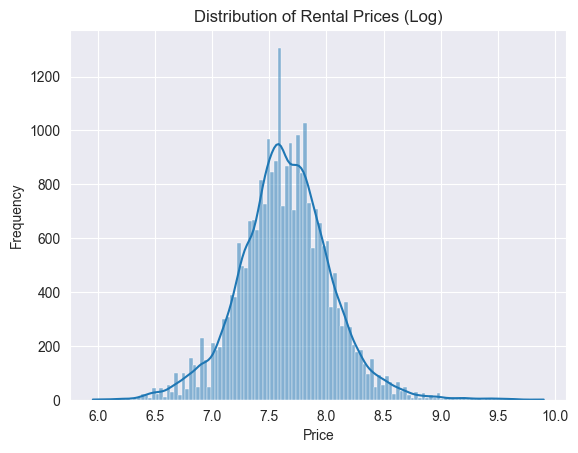

In [19]:
sns.histplot(rentals["price_log"], kde=True)
plt.title("Distribution of Rental Prices (Log)")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

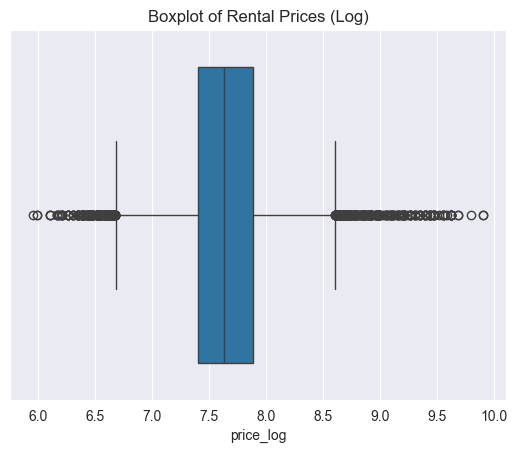

In [20]:
sns.boxplot(x=rentals["price_log"])
plt.title("Boxplot of Rental Prices (Log)")
plt.show()

### Apply Normalization

In [17]:
price_log_min = rentals["price_log"].min()
price_log_max = rentals["price_log"].max()
rentals["price_log_minmax"] = (rentals["price_log"] - price_log_min) / (price_log_max - price_log_min)

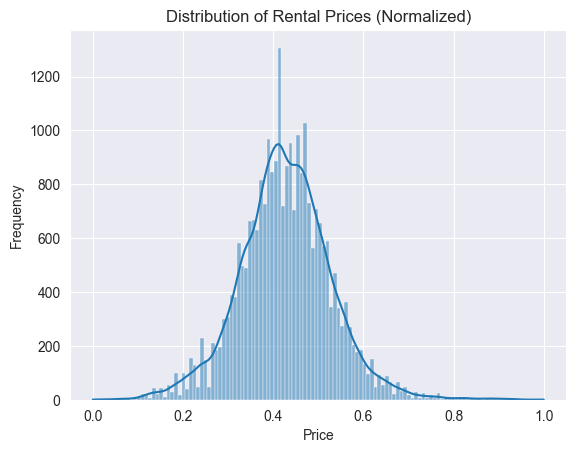

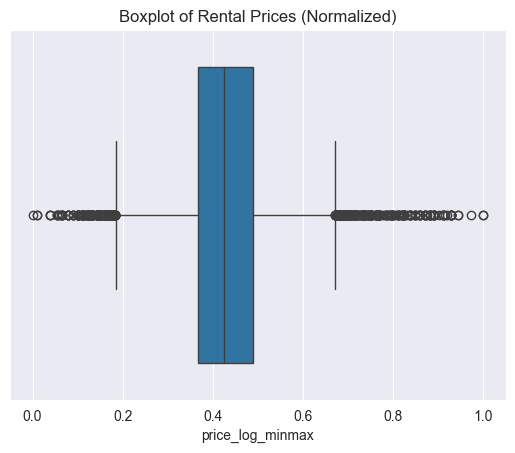

In [21]:
sns.histplot(rentals["price_log_minmax"], kde=True)
plt.title("Distribution of Rental Prices (Normalized)")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

sns.boxplot(x=rentals["price_log_minmax"])
plt.title("Boxplot of Rental Prices (Normalized)")
plt.show()

In [31]:
# Check for extreme values at the bounds:
print("Min value:", rentals["price_log_minmax"].min())
print("Max value:", rentals["price_log_minmax"].max())

lower_bound = rentals["price_log_minmax"].quantile(0.01)
upper_bound = rentals["price_log_minmax"].quantile(0.99)
print("Boundary", lower_bound, upper_bound)

Min value: 0.0
Max value: 1.0
Boundary 0.17546945005524414 0.6950045570578011


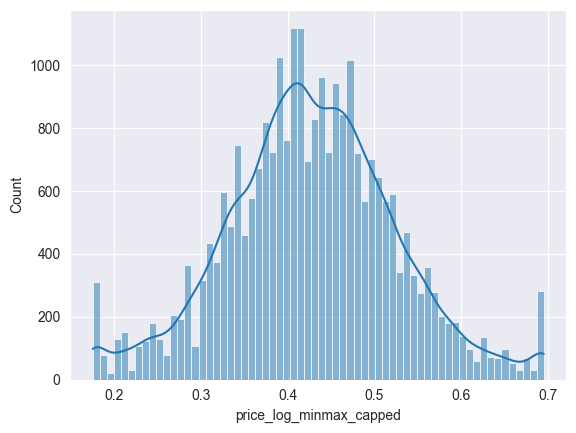

In [29]:
rentals["price_log_minmax_capped"] = rentals["price_log_minmax"].clip(lower=lower_bound, upper=upper_bound)
sns.histplot(rentals["price_log_minmax_capped"], kde=True)
plt.show()

### In conclusion, we will preprocess rental prices as the following steps:
1. Log transform on rental prices
2. Normalization
3. Cap between 1% to 99% percentile